### Import Libraries

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Read - Display Image

In [7]:
# Read the image
image = cv2.imread('./images/car.jpg')


# Print the type of the image
# The dimensions (height, width, color)
# We'll nedd the dimensions later
print('This is the image type:',type(image),
     ' with dimensions:', image.shape)


This is the image type: <class 'numpy.ndarray'>  with dimensions: (450, 660, 3)


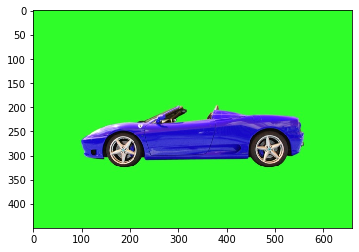

In [8]:
# Make a copy of the image
image_copy = np.copy(image)

# Change the color from BGR to RGB
immage_copy =  cv2.cvtColor(image_copy,
                           cv2.COLOR_BGR2RGB)


# Display the image
plt.imshow(image_copy)


## Define Color Threshold

In [9]:
# Isolate the Green Background
# Try it by yourselves. Change the values to getyour best result!
lower_green = np.array([0,200, 0])
upper_green = np.array([250, 255, 250])



## Creat the Mask

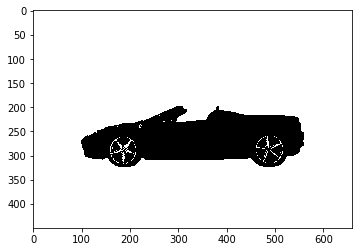

In [10]:
# Define the Masked Area
mask =cv2.inRange(image_copy,
                 lower_green,
                 upper_green)


# Visualize the Mask on the imgae
plt.imshow(mask,cmap='gray')


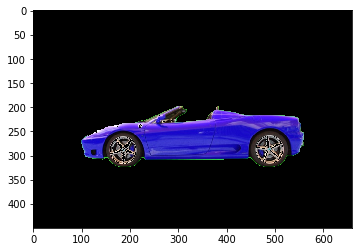

In [11]:
# Mask the Image to let your object come and show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0,0,0]


# Dispaly the Image
plt.imshow(masked_image)


## Mask and Add a Background Image

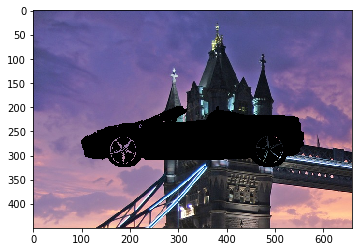

In [12]:
# Load the Image Background
background_image = cv2.imread('./images/london.jpg')

# Convert it from BGR to RGB
background_image = cv2.cvtColor(background_image,
                               cv2.COLOR_BGR2RGB)


# Crop it to the the dimensions we got
crop_background = background_image[0:450, 0:660]


# Mask the Cropped Background
# That's how the object's area is blocked
crop_background[mask == 0] = [0,0,0]


# Display the Background
plt.imshow(crop_background)


## Let's move it

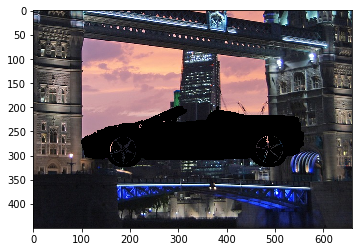

In [13]:
# x, y, h, w
x = 390
y =300
h = 450
w =660


# Convert it from BGR to RGB
background_image = cv2.imread('./images/london.jpg')
background_image = cv2.cvtColor(background_image,
                              cv2.COLOR_BGR2RGB)

# Crop it to the the dimensions we got
crop_background = background_image[y:y+h, x:x+w ]


# Mask the Cropped Background
# That's how the object's area is blocked
crop_background[mask == 0] =[0,0,0]

# Display the Background
plt.imshow(crop_background);

# Add them together and get the Final Image

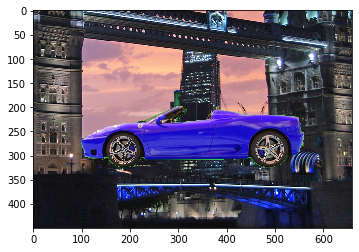

In [14]:
complete_image  = masked_image +crop_background

plt.imshow(complete_image);